In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\rs943\OneDrive\Desktop\AI&ML Bootcamp\1730285168-TelecomCustomerChurn.csv")

In [3]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
y=df["Churn"]
X=df.drop(['customerID','Churn'],axis=1)

In [13]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
ros=RandomOverSampler()

In [15]:
X,y=ros.fit_resample(X,y)

In [16]:
X.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65


In [17]:
X

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,Female,1,No,No,7,Yes,No,Fiber optic,Yes,No,No,No,No,No,Monthly,No,Bank transfer (automatic),76.45,503.6
10344,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.00,7250.15
10345,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,77.15,77.15
10346,Female,0,No,No,16,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Monthly,Yes,Credit card (automatic),93.20,1573.7


In [18]:
# Ordinal encoding
oe = OrdinalEncoder()
X = oe.fit_transform(X)

In [19]:
X

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.420e+02,
        2.505e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 4.980e+02,
        1.466e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 4.360e+02,
        1.570e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 8.470e+02,
        5.865e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.152e+03,
        1.024e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 9.000e+02,
        3.513e+03]])

In [20]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529)

In [21]:
# select model
rfc = RandomForestClassifier()

In [22]:
#train model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
# predict
y_prep = rfc.predict(X_test)

In [24]:
# Evalute model
print(classification_report(y_test,y_prep))

              precision    recall  f1-score   support

          No       0.93      0.82      0.87      1290
         Yes       0.84      0.94      0.89      1297

    accuracy                           0.88      2587
   macro avg       0.89      0.88      0.88      2587
weighted avg       0.89      0.88      0.88      2587



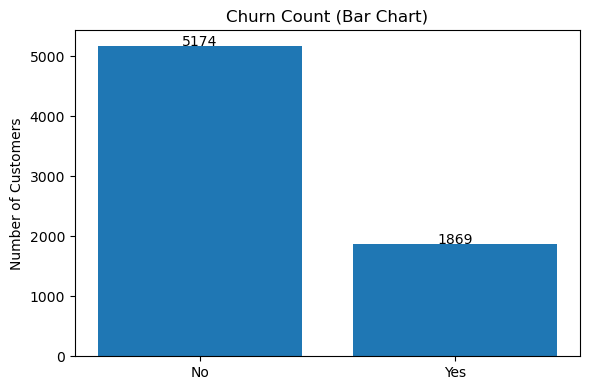

In [25]:
# Churn bar chart
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(churn_counts.index, churn_counts.values)
plt.title("Churn Count (Bar Chart)")
plt.ylabel("Number of Customers")

# Add labels on bars
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()


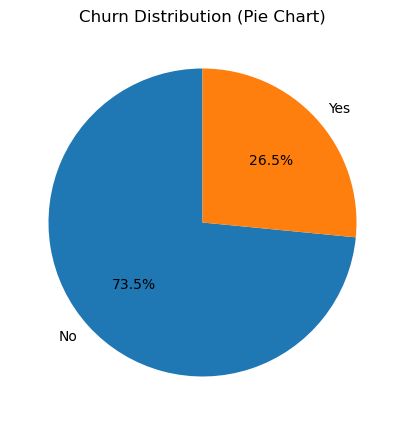

In [26]:
plt.figure(figsize=(5,5))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Churn Distribution (Pie Chart)")
plt.show()


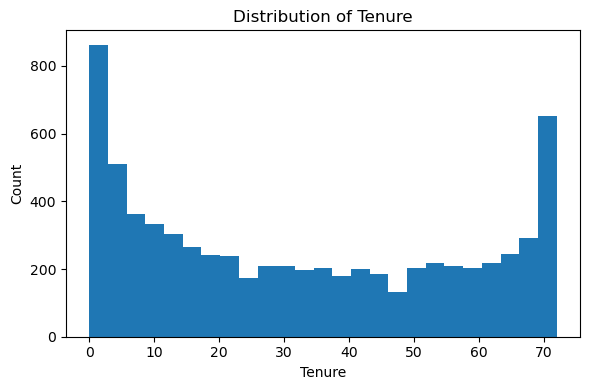

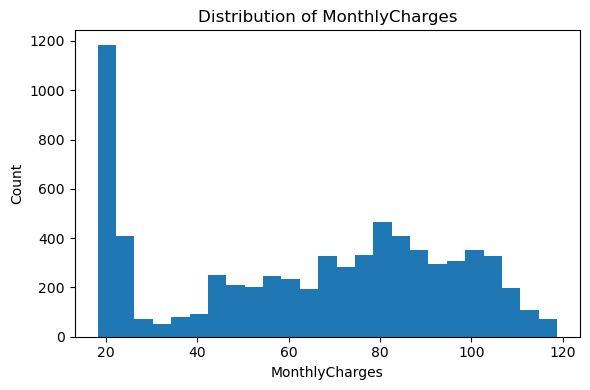

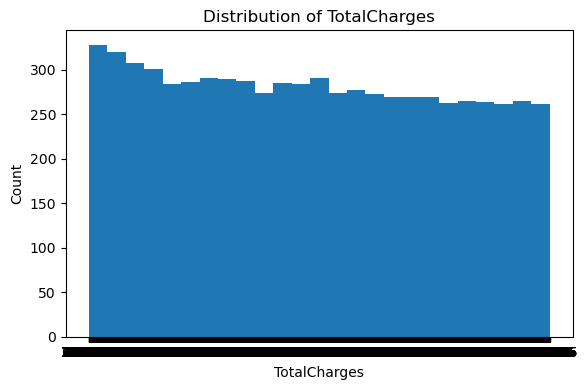

In [27]:
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=25)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


<Figure size 800x400 with 0 Axes>

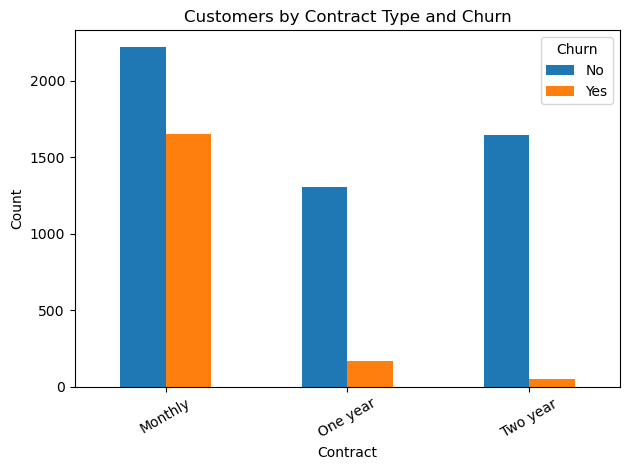

In [28]:
group = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

plt.figure(figsize=(8,4))
group.plot(kind='bar')
plt.title("Customers by Contract Type and Churn")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


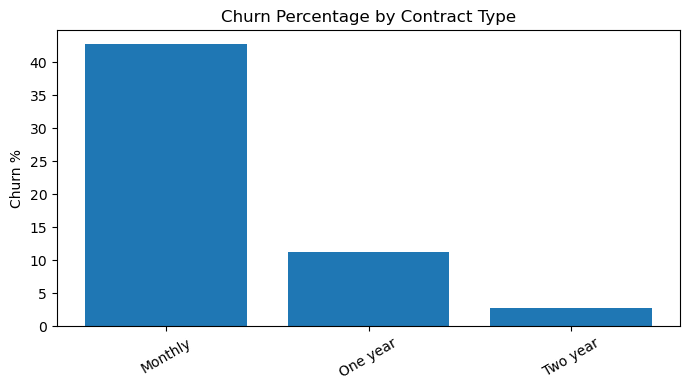

In [29]:
group_ratio = group.div(group.sum(axis=1), axis=0) * 100

plt.figure(figsize=(7,4))
plt.bar(group_ratio.index, group_ratio['Yes'])
plt.title("Churn Percentage by Contract Type")
plt.ylabel("Churn %")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


C:\Users\rs943\AppData\Local\Temp\ipykernel_15696\3649102084.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_data, yes_data], labels=['No', 'Yes'])


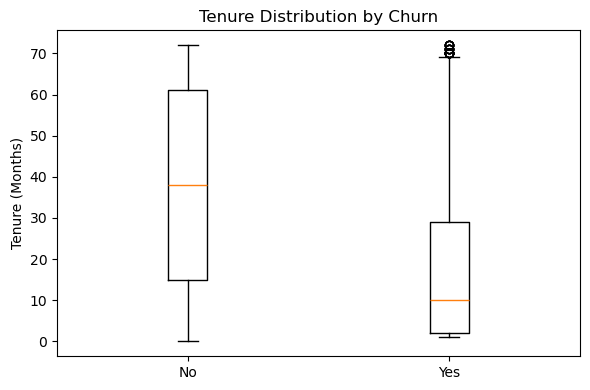

In [30]:
yes_data = df[df['Churn'] == 'Yes']['Tenure']
no_data  = df[df['Churn'] == 'No']['Tenure']

plt.figure(figsize=(6,4))
plt.boxplot([no_data, yes_data], labels=['No', 'Yes'])
plt.title("Tenure Distribution by Churn")
plt.ylabel("Tenure (Months)")
plt.tight_layout()
plt.show()


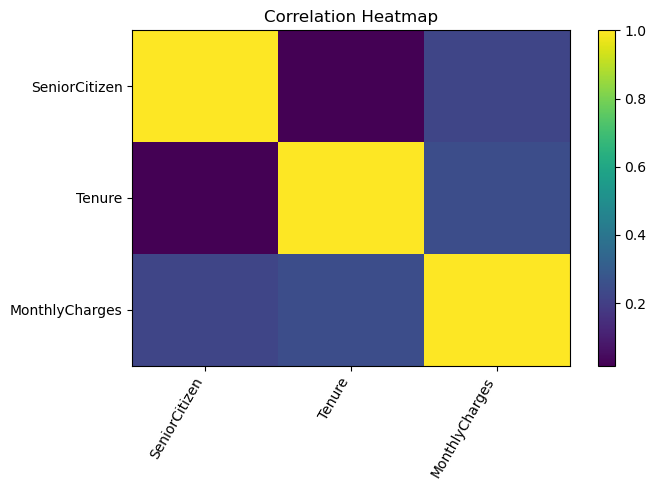

In [31]:
num_df = df.select_dtypes(include=[np.number]).fillna(0)
corr = num_df.corr()

plt.figure(figsize=(7,5))
plt.imshow(corr, cmap="viridis", aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=60, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
